In [1]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.graphics.tsaplots import plot_acf

In [2]:
data = pd.read_excel("../input/data-water/dataset.xlsx", parse_dates=['Date'])

In [3]:
data.head()

,Date,sediment,ammonia,nitrite and nitrates,total nitrogen,orthophosphate,total phosphorus
0,1996-01-01,1.86105,1.14291,6.40135,9.07396,0.03988,0.16333
1,1996-01-02,1.71009,1.18808,6.61727,9.36440,0.04248,0.16399
2,1996-01-03,1.64569,1.19614,6.65373,9.38106,0.04261,0.16258
3,1996-01-04,1.62216,1.18993,6.61180,9.29704,0.04109,0.15928
4,1996-01-05,1.57690,1.18742,6.59515,9.25673,0.03918,0.15721


In [4]:
data.tail()

,Date,sediment,ammonia,nitrite and nitrates,total nitrogen,orthophosphate,total phosphorus
6205,2012-12-27,1.05613,0.80093,6.08095,7.41384,0.02189,0.07019
6206,2012-12-28,1.20673,0.79951,5.90554,7.23591,0.02226,0.07072
6207,2012-12-29,1.14553,0.81644,6.01173,7.35478,0.02155,0.06993
6208,2012-12-30,1.03521,0.84247,6.18811,7.55553,0.02048,0.06903
6209,2012-12-31,0.98603,0.86652,6.33391,7.72391,0.02113,0.06949


In [5]:
data.info()
data.set_index(['Date'],inplace = True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6210 entries, 0 to 6209
Data columns (total 7 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   Date                  6210 non-null   datetime64[ns]
 1   sediment              6210 non-null   float64       
 2   ammonia               6210 non-null   float64       
 3   nitrite and nitrates  6210 non-null   float64       
 4   total nitrogen        6210 non-null   float64       
 5   orthophosphate        6210 non-null   float64       
 6   total phosphorus      6210 non-null   float64       
dtypes: datetime64[ns](1), float64(6)
memory usage: 339.7 KB


In [6]:
data.describe()

,sediment,ammonia,nitrite and nitrates,total nitrogen,orthophosphate,total phosphorus
count,6210.000000,6210.000000,6210.000000,6210.000000,6210.000000,6210.000000
mean,50.143950,0.371210,5.221639,7.364685,0.104838,0.260106
std,93.448332,0.329601,2.950763,3.042667,0.108550,0.161276
min,0.017510,0.025950,0.666970,2.298140,0.004520,0.027650
25%,1.182373,0.124048,2.666130,4.870310,0.029372,0.134958
50%,2.985760,0.256850,5.013470,6.938510,0.059765,0.230570
75%,84.814810,0.518123,6.748360,9.150445,0.150718,0.352708
max,2699.500490,1.347670,18.379280,20.393550,0.636950,0.964960


#### Data exploration

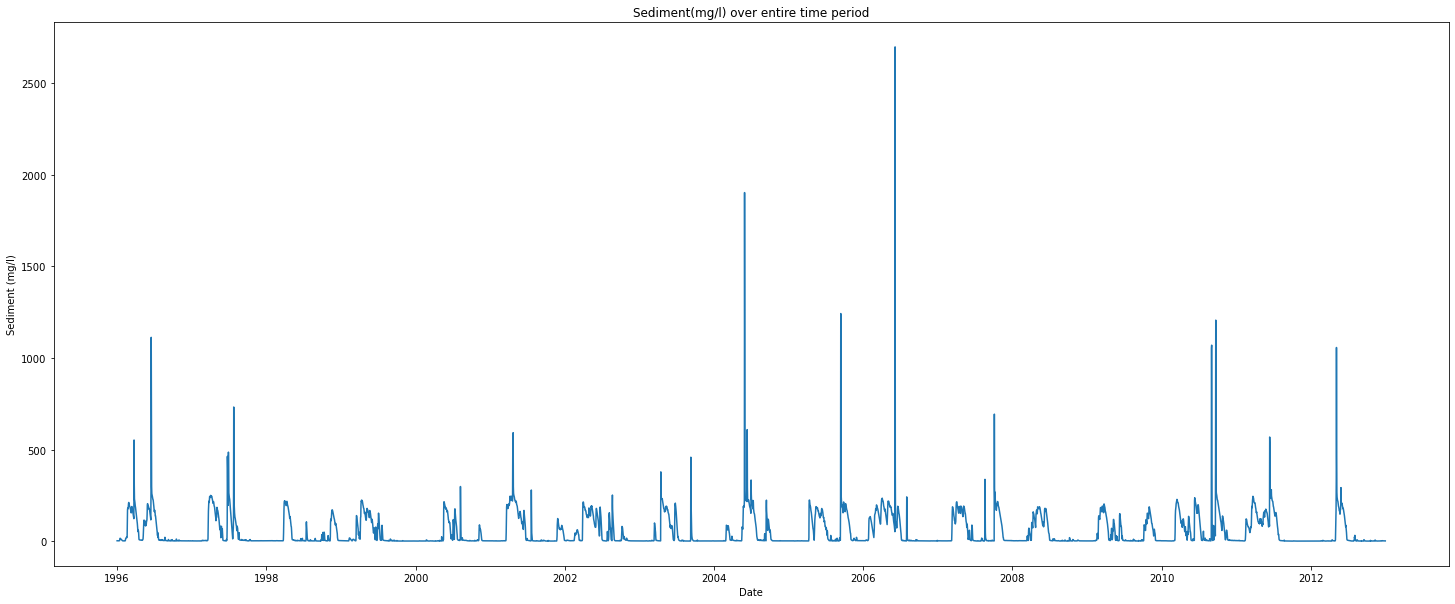

In [7]:
plt.figure(figsize=(25, 10))
plt.plot(data.sediment)
plt.title('Sediment(mg/l) over entire time period')
plt.ylabel('Sediment (mg/l)')
plt.xlabel('Date')
plt.grid(False)
plt.show()

Similarly plotting other columns

In [8]:
data.columns

Index(['sediment', 'ammonia', 'nitrite and nitrates', 'total nitrogen',
       'orthophosphate', 'total phosphorus'],
      dtype='object')

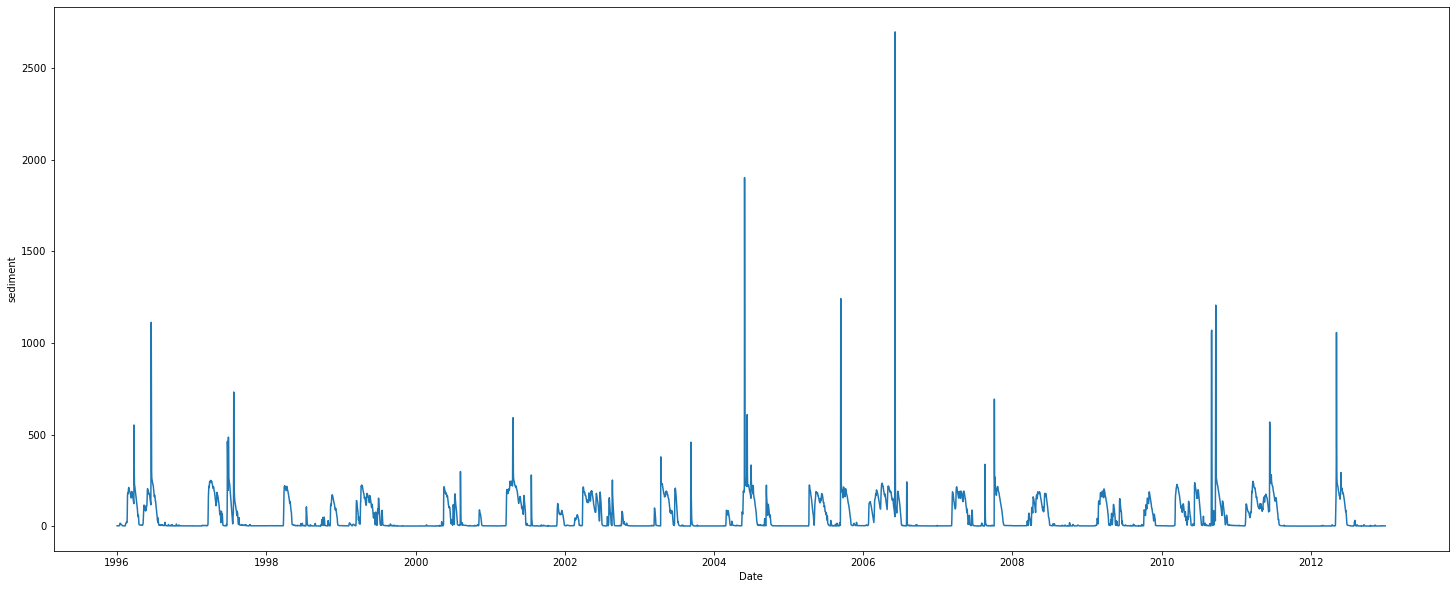

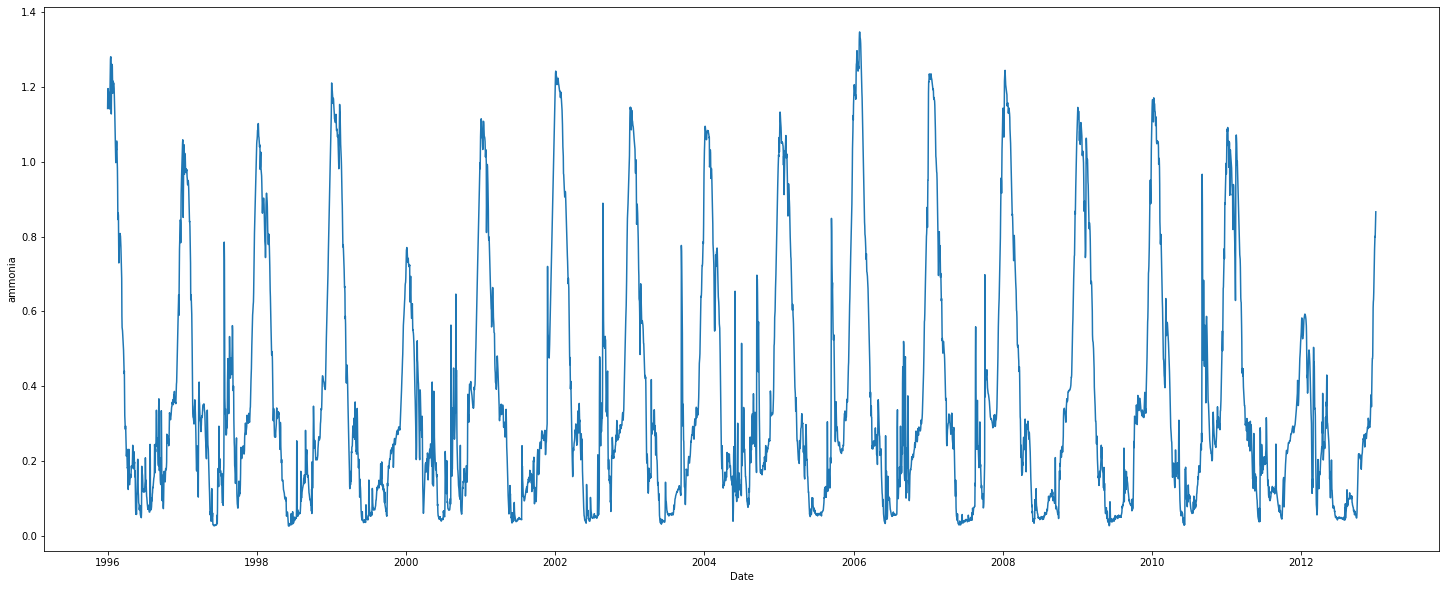

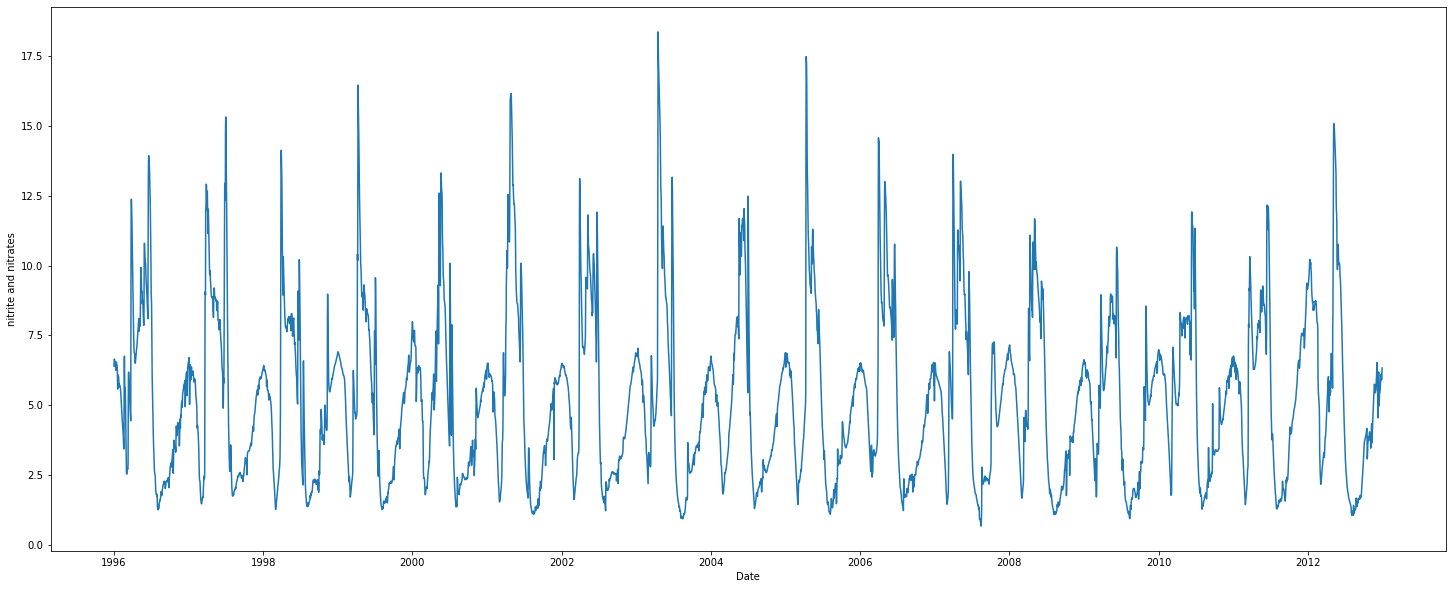

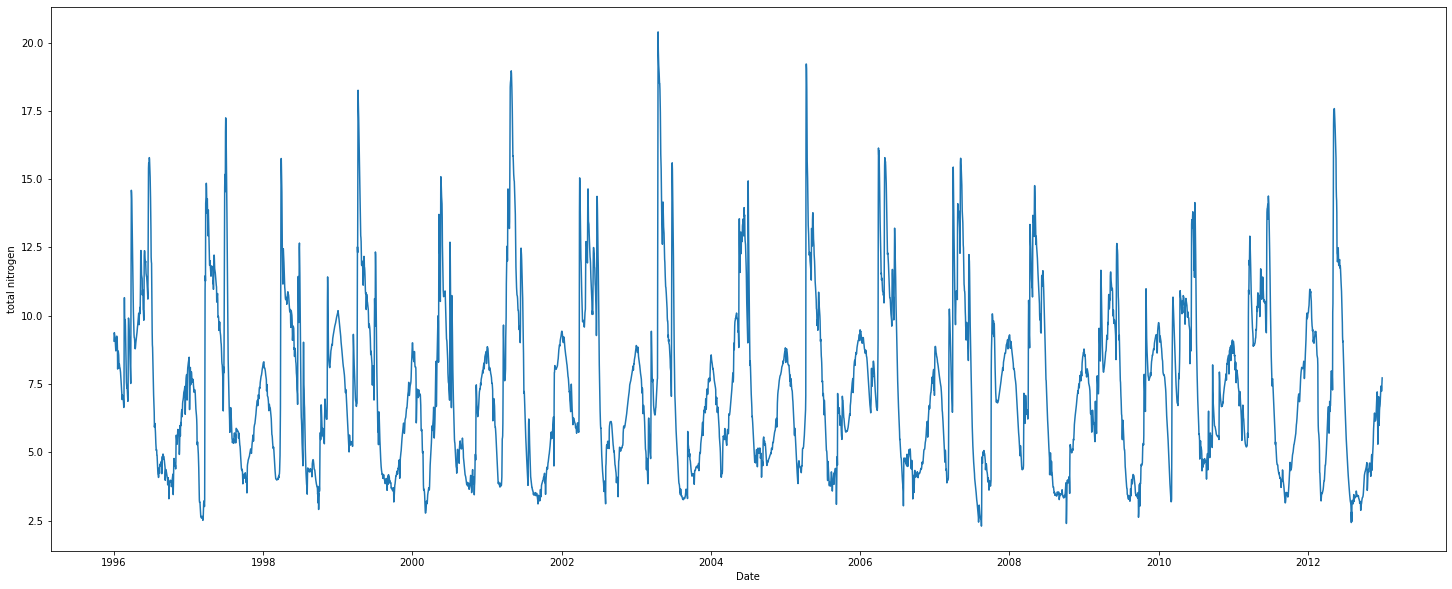

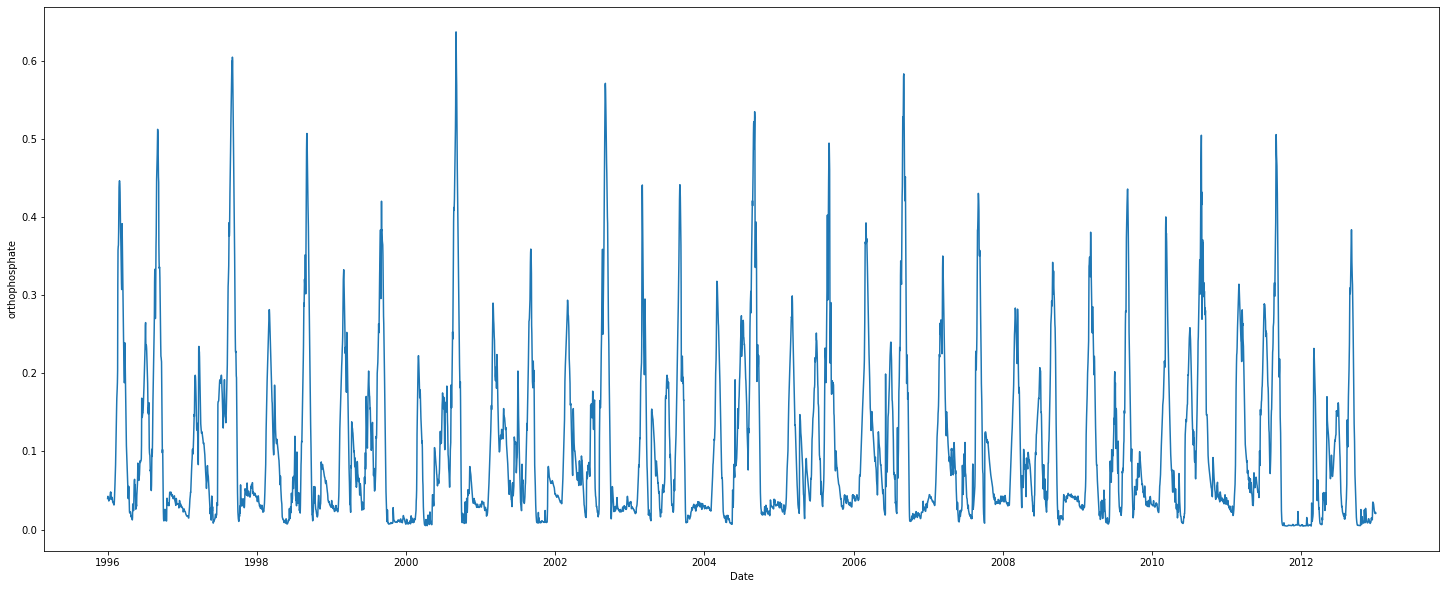

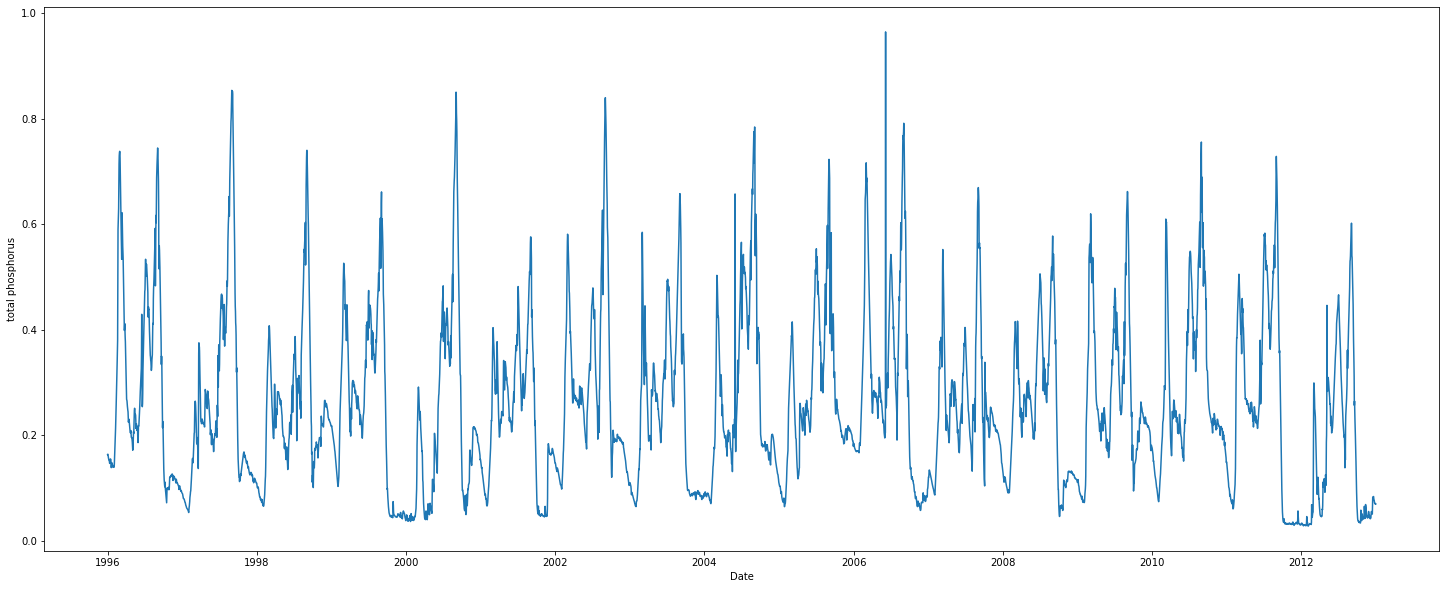

In [9]:
lis = ['sediment','ammonia', 'nitrite and nitrates', 'total nitrogen',
       'orthophosphate', 'total phosphorus']
for i in lis:
    plt.figure(figsize=(25, 10))
    plt.plot(data[i])
    plt.ylabel(i)
    plt.xlabel('Date')

Certain seasonality and periodictiy is evident in most of these graphs, espcially nitrogen and nitrates based.An earlier time data can provide useful information about the later once, hence a time series analysis will thus prove to be beneficial in this case.

Checking correlation between varaibles to choose a multivariate/univariate time series approach

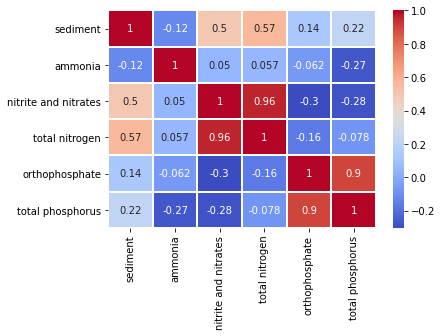

In [10]:
sns.heatmap(data.corr(),annot=True, linewidths=1 ,cmap= 'coolwarm')

- Nitrate and total nitrogen concentration is highly correlated.
- Orthophospate and total phosphorous is highly correlated.
Either of these varibales can be used to predict another hence can be used in a multivariate time series approach

Other variables shall be predicted using univariate time-series approach

### Finding seasonality using autocorrelation

<Figure size 1800x720 with 0 Axes>

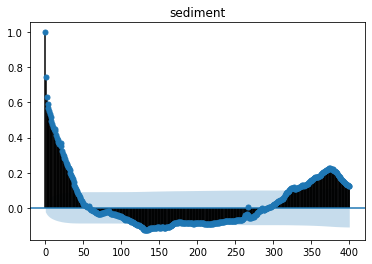

<Figure size 1800x720 with 0 Axes>

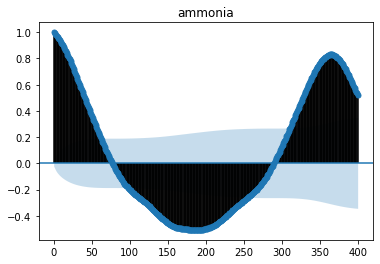

<Figure size 1800x720 with 0 Axes>

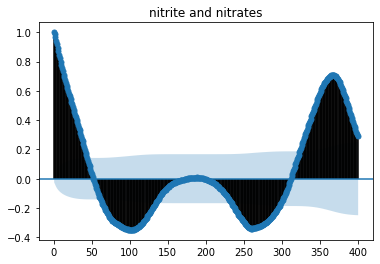

<Figure size 1800x720 with 0 Axes>

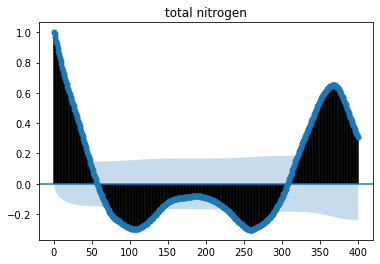

<Figure size 1800x720 with 0 Axes>

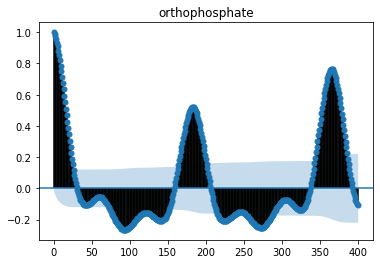

<Figure size 1800x720 with 0 Axes>

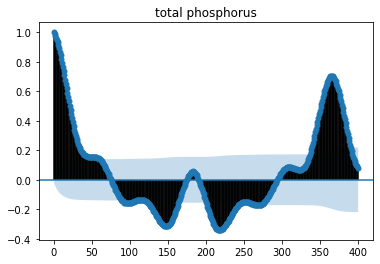

In [11]:
for i in lis:
    plt.figure(figsize=(25, 10))
    plot_acf(data[i], lags=400)
    plt.title(i)

All these autocorrelation plots are periodic, confirming seasonality in the data. (The period of graphs gives the season length)

### Check stationarity

In [12]:
##Dickey-Fuller test
from statsmodels.tsa.stattools import adfuller
#Ho: It is non stationary
#H1: It is stationary
def adfuller_test(values):
    result=adfuller(values)
    labels = ['ADF Test Statistic','p-value','#Lags Used','Number of Observations Used']
    for value,label in zip(result,labels):
        print(label+' : '+str(value) )
    if result[1] <= 0.05:
        print("Reject the null hypothesis. Data has no unit root and is stationary")
    else:
        print("Time series has a unit root, indicating it is non-stationary ")

In [13]:
for i in lis:
    print(i)
    adfuller_test(data[i])

sediment
ADF Test Statistic : -8.875565711758163
p-value : 1.3609761105126637e-14
#Lags Used : 21
Number of Observations Used : 6188
Reject the null hypothesis. Data has no unit root and is stationary
ammonia
ADF Test Statistic : -7.873294313832575
p-value : 4.919312144056238e-12
#Lags Used : 33
Number of Observations Used : 6176
Reject the null hypothesis. Data has no unit root and is stationary
nitrite and nitrates
ADF Test Statistic : -8.887863582800993
p-value : 1.2657963610928731e-14
#Lags Used : 4
Number of Observations Used : 6205
Reject the null hypothesis. Data has no unit root and is stationary
total nitrogen
ADF Test Statistic : -8.855475432866116
p-value : 1.5321144909000218e-14
#Lags Used : 3
Number of Observations Used : 6206
Reject the null hypothesis. Data has no unit root and is stationary
orthophosphate
ADF Test Statistic : -10.254144489401144
p-value : 4.406211026496999e-18
#Lags Used : 28
Number of Observations Used : 6181
Reject the null hypothesis. Data has no uni

As all p values are below thresold, all features are stationary

### Autocorrelation and Partial Autocorrelation
- Identification of an AR model is often best done with the PACF.
For an Autoregressive model, the theoretical PACF “shuts off” past the order of the model. The phrase “shuts off” means that in theory the partial autocorrelations are equal to 0 beyond that point. Put another way, the number of non-zero partial autocorrelations gives the order of the AR model. By the “order of the model” we mean the most extreme lag of x that is used as a predictor.
Identification of an MA model is often best done with the ACF rather than the PACF.

- For a Moving average model, the theoretical PACF does not shut off, but instead tapers toward 0 in some manner. A clearer pattern for an MA model is in the ACF. The ACF will have non-zero autocorrelations only at lags involved in the model.


<Figure size 864x576 with 0 Axes>

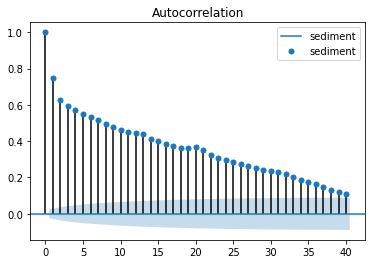

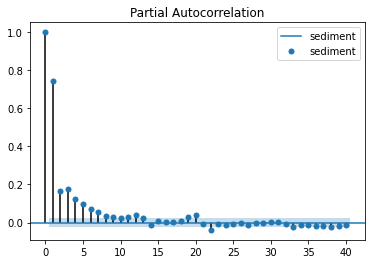

<Figure size 864x576 with 0 Axes>

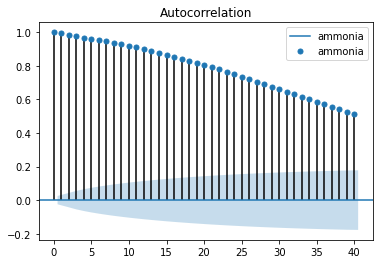

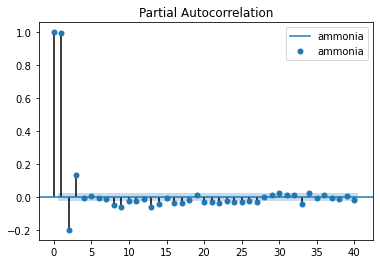

<Figure size 864x576 with 0 Axes>

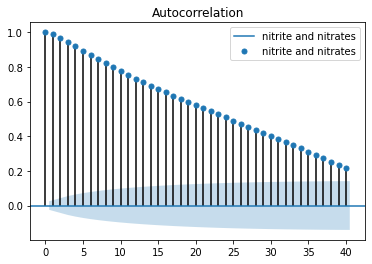

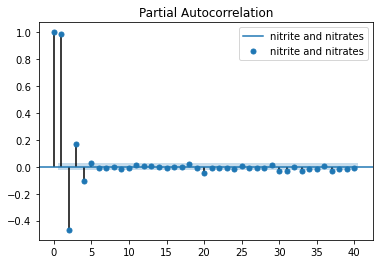

<Figure size 864x576 with 0 Axes>

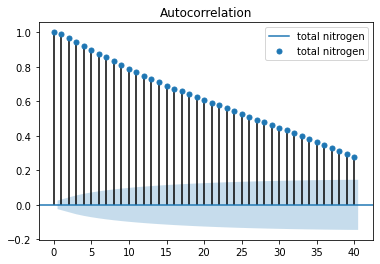

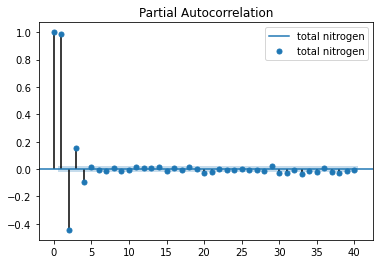

<Figure size 864x576 with 0 Axes>

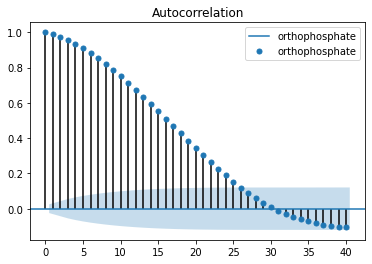

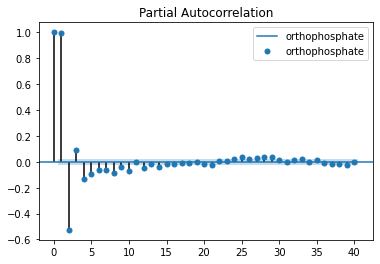

<Figure size 864x576 with 0 Axes>

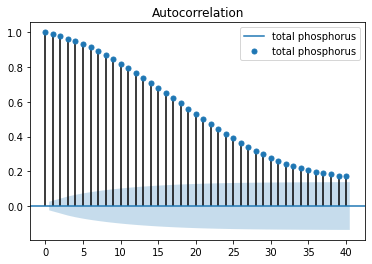

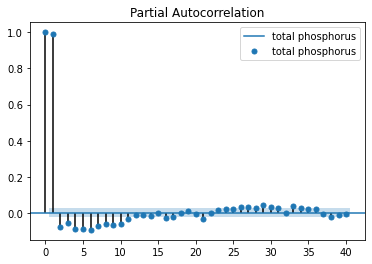

In [14]:
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf
for i in lis:
    fig = plt.figure(figsize=(12,8))
    fig = plot_acf(data[i],lags=40, label = i)
    plt.legend(loc='best')
    fig = plot_pacf(data[i],lags=40, label = i)
    plt.legend(loc='best')

#### Observations from graph
Using AR based terms(p) in the model because
- ACF plots show autocorrelation decaying towards zero
- PACF plot cuts off quickly towards zero
- ACF of a stationary series shows positive at lag-1

- sediment - p=3 , 
- ammonia - p = 2
- nitrite/nitrates - p=2
- total nitrogen p= 2
- orthophosphate/total phosphate p-=2

As the data is proven to be seasonal, we shall use Seasonal Autoregressive Integrated Moving average for modelling(SARIMA)

### Modelling

In [15]:
import statsmodels.api as sm

In [16]:
def sarima_forecast(history, config):
    order, sorder, trend = config
    # define model
    model = SARIMAX(history, order=order, seasonal_order=sorder, trend=trend, enforce_stationarity=False, enforce_invertibility=False)
    # fit model
    model_fit = model.fit(disp=False)
    # make one step forecast
    yhat = model_fit.predict(len(history), len(history))
    return yhat[0]


In [17]:
# grid search sarima hyperparameters
from math import sqrt
from multiprocessing import cpu_count
from joblib import Parallel
from joblib import delayed
from warnings import catch_warnings
from warnings import filterwarnings
from statsmodels.tsa.statespace.sarimax import SARIMAX
from sklearn.metrics import mean_squared_error
 
# one-step sarima forecast
def sarima_forecast(history, config):
    order, sorder, trend = config
    # define model
    model = SARIMAX(history, order=order, seasonal_order=sorder, trend=trend, enforce_stationarity=False, enforce_invertibility=False)
    # fit model
    model_fit = model.fit(disp=False)
    # make one step forecast
    yhat = model_fit.predict(len(history), len(history))
    return yhat[0]
 
# root mean squared error or rmse
def measure_rmse(actual, predicted):
    return sqrt(mean_squared_error(actual, predicted))
 
# split a univariate dataset into train/test sets
def train_test_split(data, n_test):
    return data[:-n_test], data[-n_test:]
 
# walk-forward validation for univariate data
def walk_forward_validation(data, n_test, cfg):
    predictions = list()
    # split dataset
    train, test = train_test_split(data, n_test)
    # seed history with training dataset
    history = [x for x in train]
    # step over each time-step in the test set
    for i in range(len(test)):
        # fit model and make forecast for history
        yhat = sarima_forecast(history, cfg)
        # store forecast in list of predictions
        predictions.append(yhat)
        # add actual observation to history for the next loop
        history.append(test[i])
    # estimate prediction error
    error = measure_rmse(test, predictions)
    return error
 
# score a model, return None on failure
def score_model(data, n_test, cfg, debug=False):
    result = None
    # convert config to a key
    key = str(cfg)
    # show all warnings and fail on exception if debugging
    if debug:
        result = walk_forward_validation(data, n_test, cfg)
    else:
        # one failure during model validation suggests an unstable config
        try:
            # never show warnings when grid searching, too noisy
            with catch_warnings():
                filterwarnings("ignore")
                result = walk_forward_validation(data, n_test, cfg)
        except:
            error = None
    # check for an interesting result
    if result is not None:
        print(' > Model[%s] %.3f' % (key, result))
    return (key, result)
 
# grid search configs
def grid_search(data, cfg_list, n_test, parallel=True):
    scores = None
    if parallel:
        # execute configs in parallel
        executor = Parallel(n_jobs=cpu_count(), backend='multiprocessing')
        tasks = (delayed(score_model)(data, n_test, cfg) for cfg in cfg_list)
        scores = executor(tasks)
    else:
        scores = [score_model(data, n_test, cfg) for cfg in cfg_list]
    # remove empty results
    scores = [r for r in scores if r[1] != None]
    # sort configs by error, asc
    scores.sort(key=lambda tup: tup[1])
    return scores
 
# create a set of sarima configs to try
def sarima_configs(seasonal=[1,7,12]):
    models = list()
    # define config lists
    p_params = [0, 1, 2]
    d_params = [0]
    q_params = [0, 1, 2]
    t_params = ['n','c','t','ct']
    P_params = [0, 1, 2]
    D_params = [0]
    Q_params = [0, 1, 2]
    m_params = seasonal
    # create config instances
    for p in p_params:
        for d in d_params:
            for q in q_params:
                for t in t_params:
                    for P in P_params:
                        for D in D_params:
                            for Q in Q_params:
                                for m in m_params:
                                    cfg = [(p,d,q), (P,D,Q,m), t]
                                    models.append(cfg)
    return models
 

In [ ]:
if __name__ == '__main__':
    # load dataset
    data = data['sediment']
    print(data.shape)
    # data split
    n_test = 1210 # 80-20 split
    # model configs
    cfg_list = sarima_configs()
    # grid search
    scores = grid_search(data, cfg_list, n_test)
    print('done')
    # list top 3 configs
    for cfg, error in scores[:3]:
        print(cfg, error)

(6210,)
 > Model[[(0, 0, 0), (0, 0, 0, 7), 'n']] 112.961
 > Model[[(0, 0, 0), (0, 0, 0, 12), 'n']] 112.961
 > Model[[(0, 0, 0), (0, 0, 1, 7), 'n']] 96.818
 > Model[[(0, 0, 0), (0, 0, 2, 7), 'n']] 95.802
 > Model[[(0, 0, 0), (0, 0, 1, 12), 'n']] 101.714
 > Model[[(0, 0, 0), (1, 0, 0, 7), 'n']] 89.530
 > Model[[(0, 0, 0), (1, 0, 0, 12), 'n']] 95.406
 > Model[[(0, 0, 0), (1, 0, 1, 7), 'n']] 85.360
 > Model[[(0, 0, 0), (0, 0, 2, 12), 'n']] 96.894
 > Model[[(0, 0, 0), (1, 0, 1, 12), 'n']] 93.023


In [ ]:
model=sm.tsa.statespace.SARIMAX(data['sediment'],order=(3, 0, 3),seasonal_order=(3,0,3,7))
results=model.fit()
data['sediment_forecast']=results.predict(start=0,end=6209,dynamic=True)
data[['sediment','sediment_forecast']].plot(figsize=(12,8))